In [155]:
import math
import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from collections import defaultdict, Counter
from glob import glob

In [156]:
with open("data/TEXTEN1.txt", "r") as f:
    text_en = f.read()

with open("data/TEXTCZ1.txt", "r", encoding="iso8859_2") as f:
    text_cz = f.read()

In [157]:
def perturb(text, p):
    """
    Randomly replace letters with probability `p`,
    while keeping word barriers intact.
    """
    alphabet = list(set(text_en) - set(["\n"]))
    
    return "".join([c
                    if (random.random() > p or c == "\n")
                    else random.choice(alphabet)
                    for c in text])


def split_text(text):
    words = text.split("\n")
    bigrams = list(zip(words, words[1:])) + [(words[-1], "<END>")]
    
    return words, bigrams

In [158]:
X = np.arange(0, 1.01, step=0.2)
texts = [perturb(text_en, e) for e in X]

In [159]:
a, b = split_text(texts[0])
assert len(a) == len(b)  # Just to make sure we padded the bigrams correctly

In [173]:
def text_entropy(text, plot=False):
    words, bigrams = split_text(text)
    
    c_1 = Counter(words)
    c_2 = Counter(bigrams)
    
    total_c1 = sum(c_1.values())
    total_c2 = sum(c_2.values())
    
    assert total_c1 == total_c2
    
    p_1 = {word: float(count) / total_c1 for word, count in c_1.items()}
    p_2 = {word: float(count) / total_c2 for word, count in c_2.items()}
    
    if plot:
        print(sorted(c_1.values())[-100:])
        plt.plot(np.log(list(sorted(c_1.values()))))
        plt.show()
        plt.plot(np.log(list(sorted(set(c_1.values())))))
        plt.show()

    p_2c = dict()
    
    for key in c_2.keys():
        i, j = key

        if c_1[i] == 0:
            p_2c[key] = 0
        else:
            p_2c[key] = float(p_2[key]) / p_1[i]

            
    cond_entropy = 0

    for key in c_2.keys():
        if key in p_2c and p_2c[key] > 0:
            cond_entropy -= p_2[key] * math.log2(p_2c[key])
            
    perplexity = 2 ** cond_entropy

    return cond_entropy

In [174]:
text_entropy(text_en)

5.287460725971182

In [175]:
text_entropy(perturb(text_en, 1))

1.6015427569244651

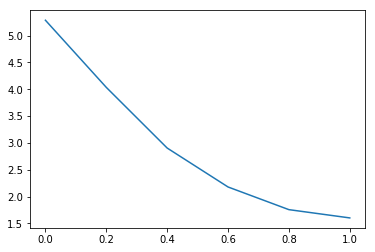

In [176]:
X = np.arange(0, 1.01, step=0.2)
ents = [text_entropy(perturb(text_en, e)) for e in X]
plt.plot(X, ents)
plt.show()

# Conditional entropy

In [179]:
def min_avg_max(items):
    return min(items), np.mean(items).item(), max(items)

In [177]:
random.seed(1)

ents = [text_entropy(perturb(text_en, 0.1)) for _ in range(10)]
print(min_max_avg(ents))

4.723077029182792 4.73114646795427 4.7368218532462185


In [211]:
random.seed(1)

data = []
p_values = [0.1, 0.05, 0.01, 0.001, 0.0001, 0.00001]

for p in p_values:
    ents = [text_entropy(perturb(text_en, p)) for _ in range(10)]
    
    data.append(min_avg_max(ents))
    
data = np.array(data)

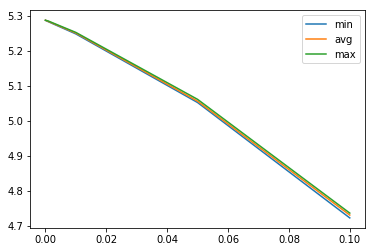

In [217]:
for i, label in enumerate(["min", "avg", "max"]):
    plt.plot(p_values, data[:, i], label=label)
    
plt.legend()